In [13]:
!pip install "tensorflow<2.11" --ignore-installed --user

  Using cached tensorflow-2.10.1-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
  Using ca

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import tensorflow as tf

In [5]:
import time 
print(f"TensorFlow version: {tf.__version__}")

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
else:
    print("No GPUs detected.")

matrix_a = tf.random.normal(shape=(1000, 1000))
matrix_b = tf.random.normal(shape=(1000, 1000))
start_time_cpu = time.time()
result_cpu = tf.matmul(matrix_a, matrix_b)
end_time_cpu = time.time()
print("Time on CPU:", end_time_cpu - start_time_cpu)

if gpus:
    matrix_a_gpu = tf.constant(matrix_a)
    matrix_b_gpu = tf.constant(matrix_b)
    start_time_gpu = time.time()
    result_gpu = tf.matmul(matrix_a_gpu, matrix_b_gpu)
    end_time_gpu = time.time()

    print("Time on GPU:", end_time_gpu - start_time_gpu)
else:
    print("GPU not available.")

TensorFlow version: 2.10.1
1 Physical GPUs, 1 Logical GPUs
Time on CPU: 1.4039394855499268
Time on GPU: 0.0


In [6]:
import os
from shutil import copyfile
os.makedirs('images/NORMAL', exist_ok=True)
os.makedirs('images/PNEUMONIA', exist_ok=True)

base_path = './kaggle/input/chest-xray-pneumonia/chest_xray'

for path in ['/train', '/test', '/val']:
    for dirname, _, filenames in os.walk(base_path + path):
        for i, file in enumerate(filenames):
            img_class = dirname.split('/')[5]
            img_class = img_class.split('\\')[1]
            
            copyfile(os.path.join(dirname, file), 'images/' + img_class + '/' + file)

In [9]:
for dirname, _, filenames in os.walk('./images'):
    if(len(dirname.split("/")) > 1):
        print(dirname + " has " + str(len(filenames)) + " files")

./images has 0 files
./images\NORMAL has 1583 files
./images\PNEUMONIA has 4273 files


In [12]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 640.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 402.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 960.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.3/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.0 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/11.0 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/11.0 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.0 MB 3.5 MB/s eta 0:00:03


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from shutil import rmtree

#rmtree('train') # Remove existing, if re-run
#rmtree('test') # Remove existing, if re-run

os.makedirs('train/NORMAL', exist_ok=True)
os.makedirs('train/PNEUMONIA', exist_ok=True)
os.makedirs('test/NORMAL', exist_ok=True)
os.makedirs('test/PNEUMONIA', exist_ok=True)

# Split NORMAL
train, test = train_test_split(os.listdir('images/NORMAL'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('train/NORMAL/', img))
for img in test:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('test/NORMAL/', img))

# Split PNEUMONIA
train, test = train_test_split(os.listdir('images/PNEUMONIA'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('train/PNEUMONIA/', img))
for img in test:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('test/PNEUMONIA/', img))

In [15]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---- -------------------------------- 20.5/165.5 kB 640.0 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 393.8 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.5 kB 465.5 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.5 kB 654.9 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 764.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
    --------------------------------------- 0.1/7.9 MB 3.5 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.9 MB 2.9 MB/s eta 0:00:03
   - -------------------------------------- 0.4/7.9 MB 3.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.9 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.9 MB 4.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/7.9 MB 5.0 MB/s eta 0:00:02
  

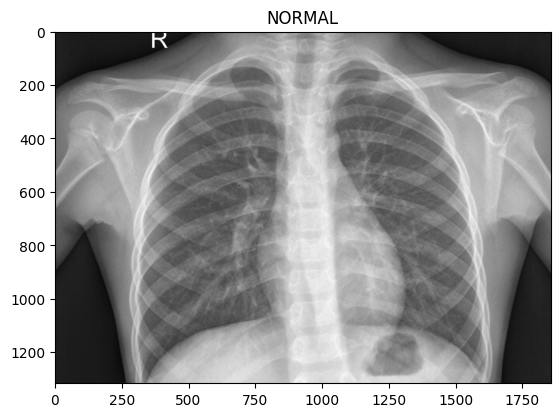

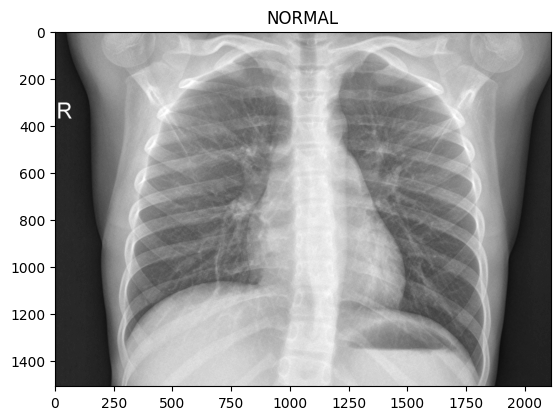

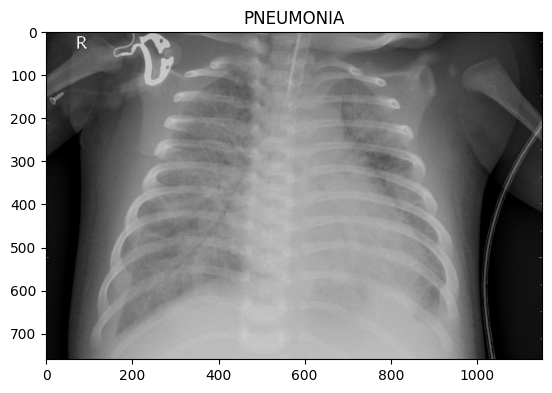

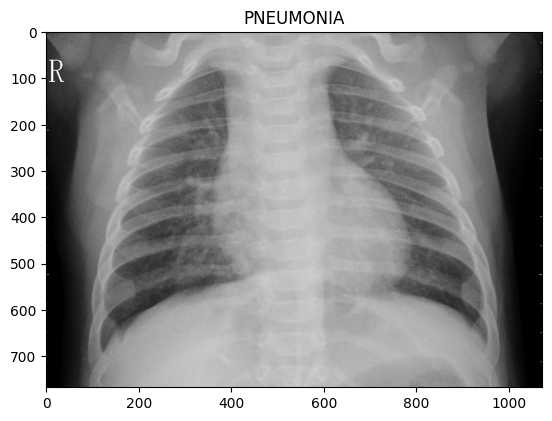

In [19]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

for dirname, _, filenames in os.walk('train'):
    for i, file in enumerate(filenames):
        if(i > 1):
            break
        plt.imshow(mpimg.imread(os.path.join(dirname, file)), cmap='gray')
        plt.title(dirname.split('\\')[1])
        plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SIZE = 128
BATCH = 32

# image augmentations
image_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                validation_split=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'
                              )

# flow_from_directory generators
train_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='training')

validation_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='validation')

Found 3748 images belonging to 2 classes.
Found 936 images belonging to 2 classes.


In [24]:
!pip install efficientnet

In [4]:
import sys
from PIL import Image

In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision

# Ensure consistent import of EfficientNet
import efficientnet.tfkeras as efn

# Callbacks
## Keep the best model
mc = ModelCheckpoint('model.keras', 
                     save_best_only=True, 
                     verbose=0, 
                     monitor='val_loss', 
                     mode='min')

## Reduce learning rate if it gets stuck in a plateau
rlr = ReduceLROnPlateau(monitor='val_loss', 
                        factor=0.3, 
                        patience=3, 
                        min_lr=0.000001, 
                        verbose=1)

# Model
## Define the base model with EfficientNet weights
model = efn.EfficientNetB2(weights='imagenet', 
                           include_top=False, 
                           input_shape=(SIZE, SIZE, 3))

## Output layer
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

## Compile and run
model = Model(inputs=model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy', Recall(), Precision()])

model_history = model.fit(train_generator,
                          validation_data=validation_generator,
                          steps_per_epoch=int(train_generator.n / BATCH),
                          validation_steps=int(validation_generator.n / BATCH),
                          epochs=30,
                          verbose=1,
                          callbacks=[mc, rlr])

31936256/31936256 [==============================] - 2s 0us/step
Epoch 1/30
117/117 [==============================] - 53s 375ms/step - loss: 0.2526 - accuracy: 0.8991 - recall_1: 0.9388 - precision_1: 0.9241 - val_loss: 1.7588 - val_accuracy: 0.7360 - val_recall_1: 1.0000 - val_precision_1: 0.7343 - lr: 0.0010
Epoch 2/30
117/117 [==============================] - 42s 358ms/step - loss: 0.1797 - accuracy: 0.9370 - recall_1: 0.9595 - precision_1: 0.9546 - val_loss: 0.1718 - val_accuracy: 0.9203 - val_recall_1: 0.9809 - val_precision_1: 0.9161 - lr: 0.0010
Epoch 3/30
117/117 [==============================] - 42s 358ms/step - loss: 0.1632 - accuracy: 0.9392 - recall_1: 0.9547 - precision_1: 0.9618 - val_loss: 0.1268 - val_accuracy: 0.9494 - val_recall_1: 0.9705 - val_precision_1: 0.9605 - lr: 0.0010
Epoch 4/30
117/117 [==============================] - 41s 351ms/step - loss: 0.1482 - accuracy: 0.9438 - recall_1: 0.9631 - precision_1: 0.9599 - val_loss: 0.2209 - val_accuracy: 0.9321 - val

117/117 [==============================] - 24s 208ms/step - loss: 0.0273 - accuracy: 0.9909 - recall_1: 0.9959 - precision_1: 0.9916 - val_loss: 0.0520 - val_accuracy: 0.9763 - val_recall_1: 0.9822 - val_precision_1: 0.9852 - lr: 8.1000e-06
Epoch 30/30
117/117 [==============================] - 24s 203ms/step - loss: 0.0287 - accuracy: 0.9890 - recall_1: 0.9930 - precision_1: 0.9919 - val_loss: 0.0690 - val_accuracy: 0.9741 - val_recall_1: 0.9793 - val_precision_1: 0.9851 - lr: 8.1000e-06


In [18]:
model.load_weights("model.keras")

<Figure size 640x480 with 0 Axes>

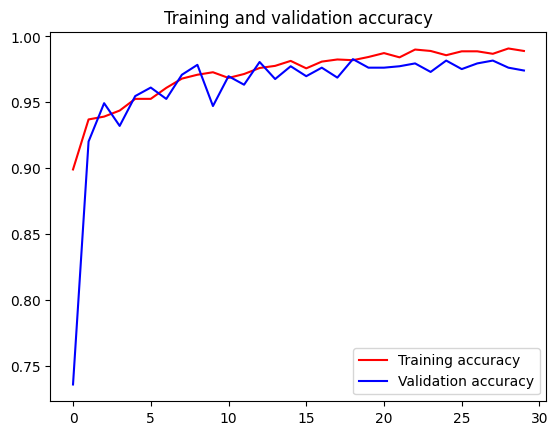

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator
test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=5,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    directory="test",
    target_size=(SIZE, SIZE),
    class_mode="binary",
    shuffle=False,
    batch_size=BATCH
)

# Use model.predict with the generator
preds = model.predict(test_generator)  # get probability predictions

# Convert probabilities to binary classes
labels = 1 * (preds > 0.5)


Found 1172 images belonging to 2 classes.
37/37 [==============================] - 10s 246ms/step


In [22]:
!pip install mlxtend 

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 495.5 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 550.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 585.1 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 766.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 1.8 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   --- -----------------

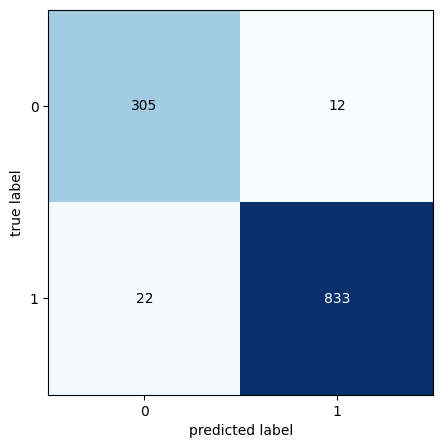

In [23]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
CM = confusion_matrix(test_generator.classes, labels)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, labels))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       317
           1       0.99      0.97      0.98       855

    accuracy                           0.97      1172
   macro avg       0.96      0.97      0.96      1172
weighted avg       0.97      0.97      0.97      1172



In [25]:
from tensorflow.keras.callbacks import History

# Define the number of epochs as an integer
epochs = 10  # or any other integer value

# Ensure steps_per_epoch and validation_steps are within the available samples
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Initialize history callback
history = History()

# Add the history callback to the model's fit method
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[history]
)

Epoch 1/10
117/117 [==============================] - 25s 213ms/step - loss: 0.0390 - accuracy: 0.9874 - recall_1: 0.9934 - precision_1: 0.9893 - val_loss: 0.0704 - val_accuracy: 0.9784 - val_recall_1: 0.9809 - val_precision_1: 0.9896
Epoch 2/10
117/117 [==============================] - 26s 218ms/step - loss: 0.0314 - accuracy: 0.9906 - recall_1: 0.9956 - precision_1: 0.9916 - val_loss: 0.0717 - val_accuracy: 0.9731 - val_recall_1: 0.9763 - val_precision_1: 0.9865
Epoch 3/10
117/117 [==============================] - 25s 215ms/step - loss: 0.0270 - accuracy: 0.9919 - recall_1: 0.9952 - precision_1: 0.9937 - val_loss: 0.0566 - val_accuracy: 0.9817 - val_recall_1: 0.9823 - val_precision_1: 0.9925
Epoch 4/10
117/117 [==============================] - 25s 213ms/step - loss: 0.0299 - accuracy: 0.9887 - recall_1: 0.9941 - precision_1: 0.9904 - val_loss: 0.0689 - val_accuracy: 0.9741 - val_recall_1: 0.9749 - val_precision_1: 0.9895
Epoch 5/10
117/117 [==============================] - 25s 21

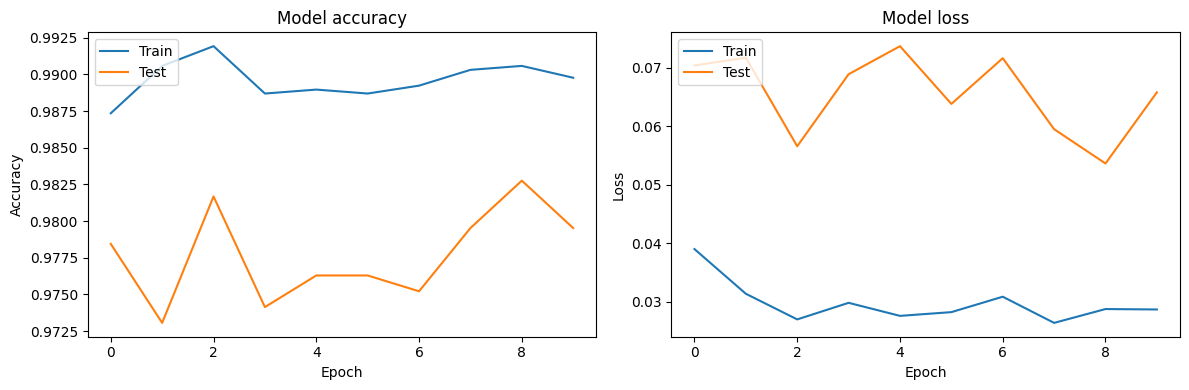

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

37/37 [==============================] - 6s 163ms/step


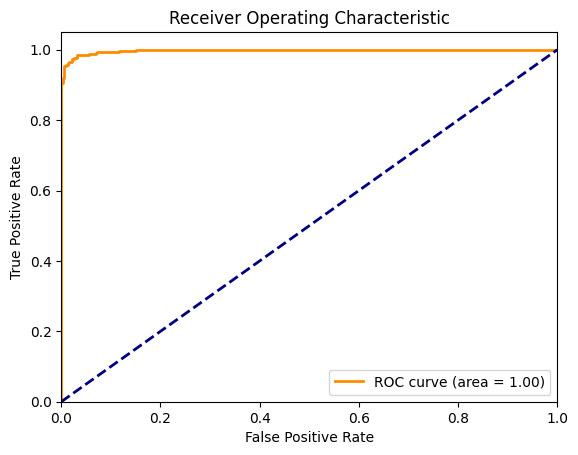

In [27]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# For binary classification, use the predicted probabilities directly
y_pred_prob = y_pred[:, 0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()